## Build Vehicle

In [1]:
from pathlib import Path

from donkeycar.parts.angle import AngleRoadPart, RoadEllipseDebugPart
from donkeycar.parts.road import ComponentRoadPart
from donkeycar.vehicle import Vehicle
from donkeycar.parts.camera import VideoCamera

video = Path('../donkeycar/tests/data/video2.mp4')

video_camera = VideoCamera(video)

vehicle = Vehicle()
vehicle.register(video_camera)
vehicle.register(ComponentRoadPart())
vehicle.register(AngleRoadPart())
vehicle.register(RoadEllipseDebugPart())


using donkey v2.2.1 ...


## Run vehicle

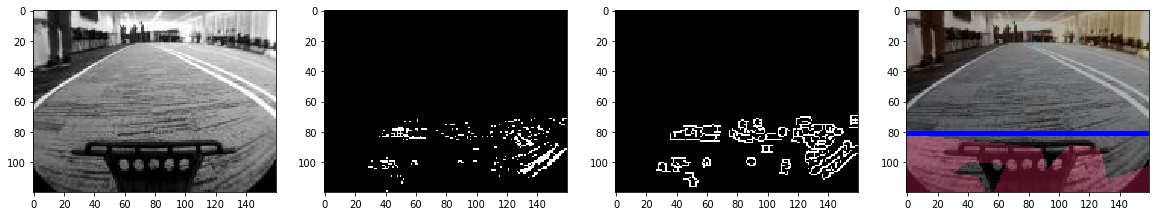

In [3]:
import cv2
import matplotlib.pyplot as plt

from donkeycar.parts.img_process import ConvertToGrayPart, ThresholdPart, CannyPart
from donkeycar.parts.road import RoadDebugPart

vehicle.update_parts()

gray = cv2.cvtColor(vehicle.mem.get([ConvertToGrayPart.IMG_GRAY_RAW])[0].copy(), cv2.COLOR_GRAY2BGRA)
threshold = cv2.cvtColor(vehicle.mem.get([ThresholdPart.IMG_THRESHOLD])[0].copy(), cv2.COLOR_GRAY2BGRA)
canny = cv2.cvtColor(vehicle.mem.get([CannyPart.IMG_CANNY])[0].copy(), cv2.COLOR_GRAY2BGRA)
road = vehicle.mem.get([RoadDebugPart.IMG_ROAD])[0]
road_ellipse = vehicle.mem.get([RoadEllipseDebugPart.IMG_ROAD_ELLIPSE])[0]

plt.figure(1, figsize=(20, 30))

plt.subplot('141')
plt.imshow(gray)

plt.subplot('142')
plt.imshow(threshold)

plt.subplot('143')
plt.imshow(canny)

plt.subplot('144')
plt.imshow(road)
